In [2]:
import pandas as pd

In [80]:
table1=pd.read_csv(r"D:\data science\partice_projects\sql projects\pizza-sales---SQL-main\visual\table1.csv")# Analyze the cumulative revenue generated over time.
table2=pd.read_csv(r"D:\data science\partice_projects\sql projects\pizza-sales---SQL-main\visual\table2.csv")# Top 5 Pizza Types by Revenue
table3=pd.read_csv(r"D:\data science\partice_projects\sql projects\pizza-sales---SQL-main\visual\table3.csv")#top 5 most ordered pizza
table4=pd.read_csv(r"D:\data science\partice_projects\sql projects\pizza-sales---SQL-main\visual\table4.csv")# Top 5 Highest Priced Pizzas
table5=pd.read_csv(r"D:\data science\partice_projects\sql projects\pizza-sales---SQL-main\visual\table5.csv")# Top 5 Most Ordered Pizza Sizes






In [57]:
table3.head()

,name,quantity
0,The Classic Deluxe Pizza,2453
1,The Barbecue Chicken Pizza,2432
2,The Hawaiian Pizza,2422
3,The Pepperoni Pizza,2418
4,The Thai Chicken Pizza,2371


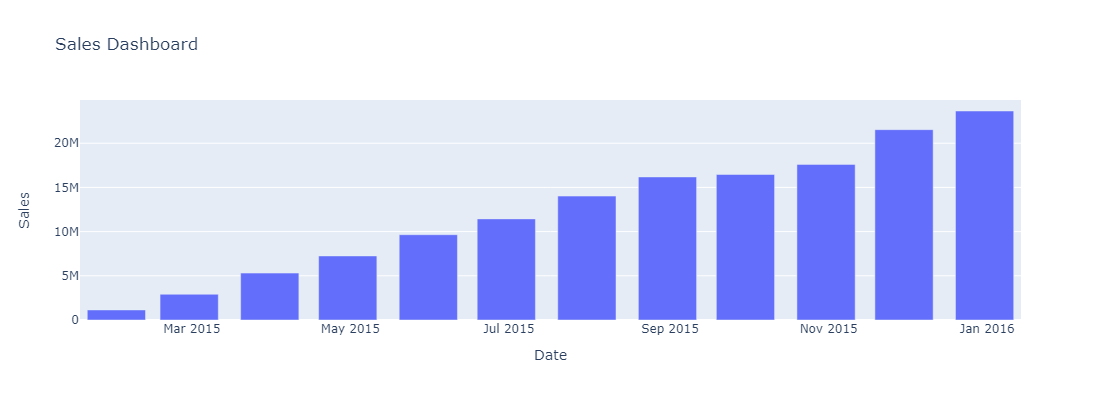

In [24]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

# Assuming your sales data is in a CSV file
sales_data = pd.read_csv(r"D:\data science\partice_projects\sql projects\pizza-sales---SQL-main\visual\table1.csv")

# Convert the date column to datetime format
sales_data['date'] = pd.to_datetime(sales_data['date'], format='%d-%m-%Y')





fig = go.Figure(data=[
   
    go.Bar(x=monthly_sales.index, y=monthly_sales.values, name='Monthly Sales')
])

fig.update_layout(
    height=400,
    width=800,
    title_text="Sales Dashboard",
    xaxis_title="Date",
    yaxis_title="Sales"
)

fig.show()

# Highlight table (assuming you have a 'product' column, if not, adjust accordingly)



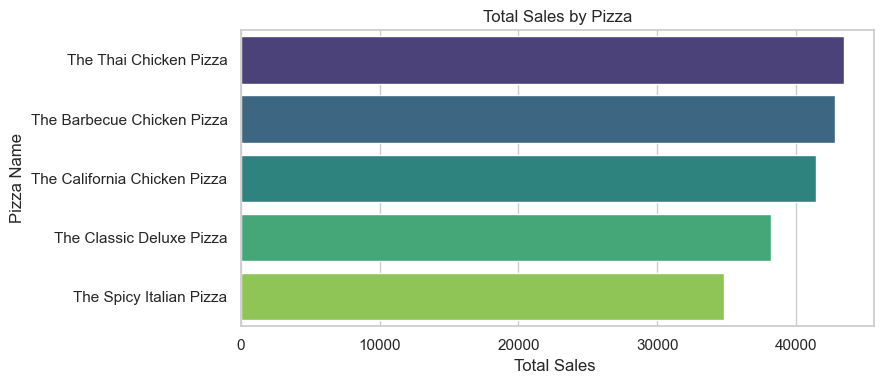

In [34]:
# Set the theme
sns.set_theme(style="whitegrid")

# Plot for Total Sales by Pizza
plt.figure(figsize=(9, 4))
sns.barplot(x='total', y='name', data=table2.sort_values(by='total', ascending=False), palette='viridis')
plt.title('Total Sales by Pizza')
plt.xlabel('Total Sales ')
plt.ylabel('Pizza Name')

# Show the plot
plt.tight_layout()
plt.show()


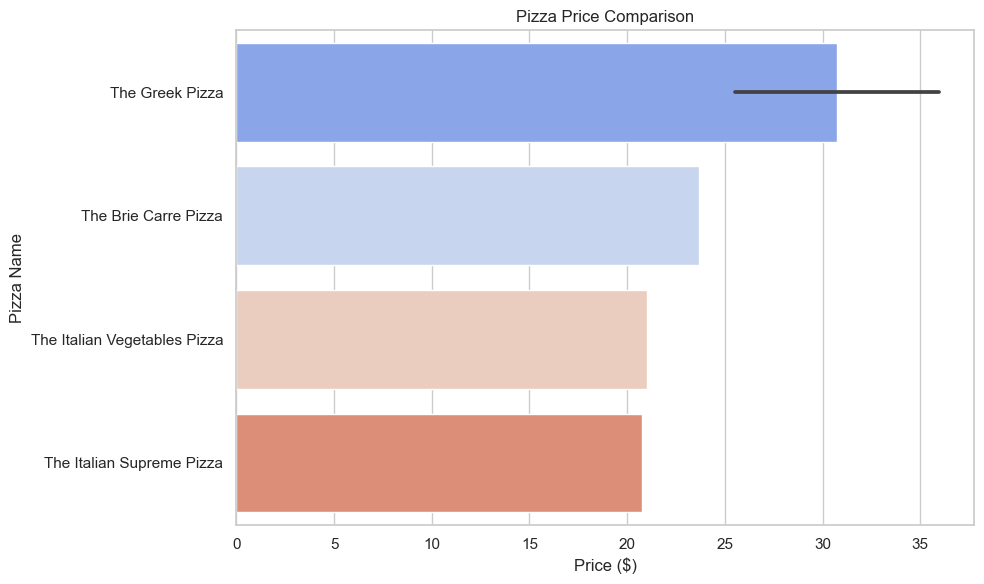

In [35]:
sns.set_theme(style="whitegrid")

# Plot for Pizza Price Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='name', data=table4.sort_values(by='price', ascending=False), palette='coolwarm')
plt.title('Pizza Price Comparison')
plt.xlabel('Price ($)')
plt.ylabel('Pizza Name')

# Show the plot
plt.tight_layout()
plt.show()


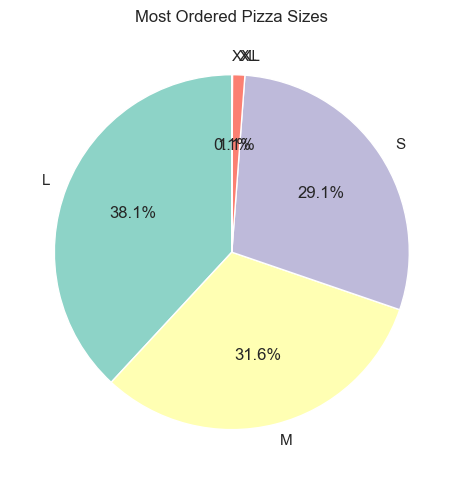

In [78]:
sizes = table5['most_ordered']
labels = table5['size']

# Plot for Most Ordered Pizza Sizes
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Most Ordered Pizza Sizes')

# Show the plot
plt.tight_layout()
plt.show()


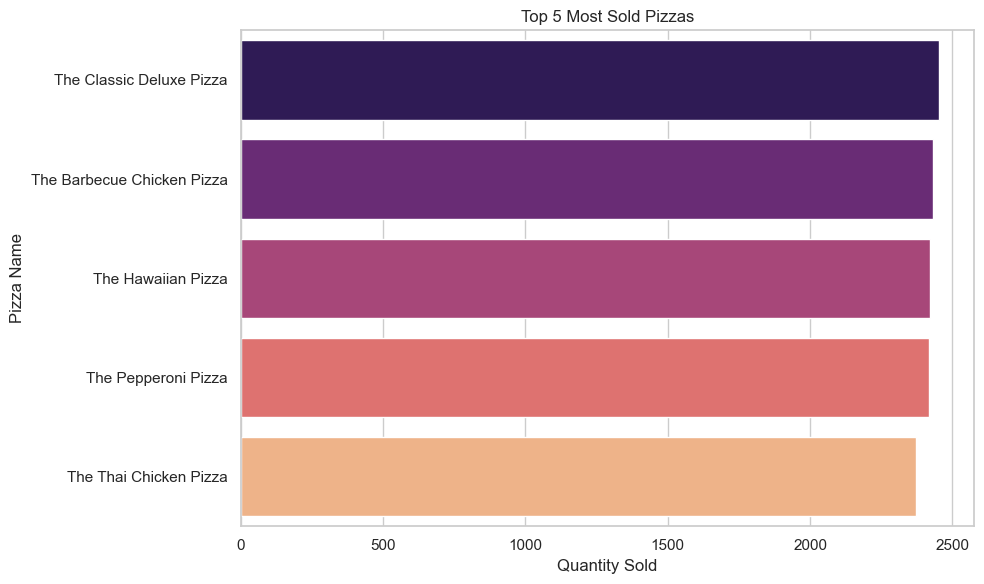

In [60]:
sns.set_theme(style="whitegrid")

# Plot for Top 5 Most Sold Pizzas
plt.figure(figsize=(10, 6))
sns.barplot(x='quantity', y='name', data=table3.sort_values(by='quantity', ascending=False), palette='magma')
plt.title('Top 5 Most Sold Pizzas')
plt.xlabel('Quantity Sold')
plt.ylabel('Pizza Name')

# Show the plot
plt.tight_layout()
plt.show()


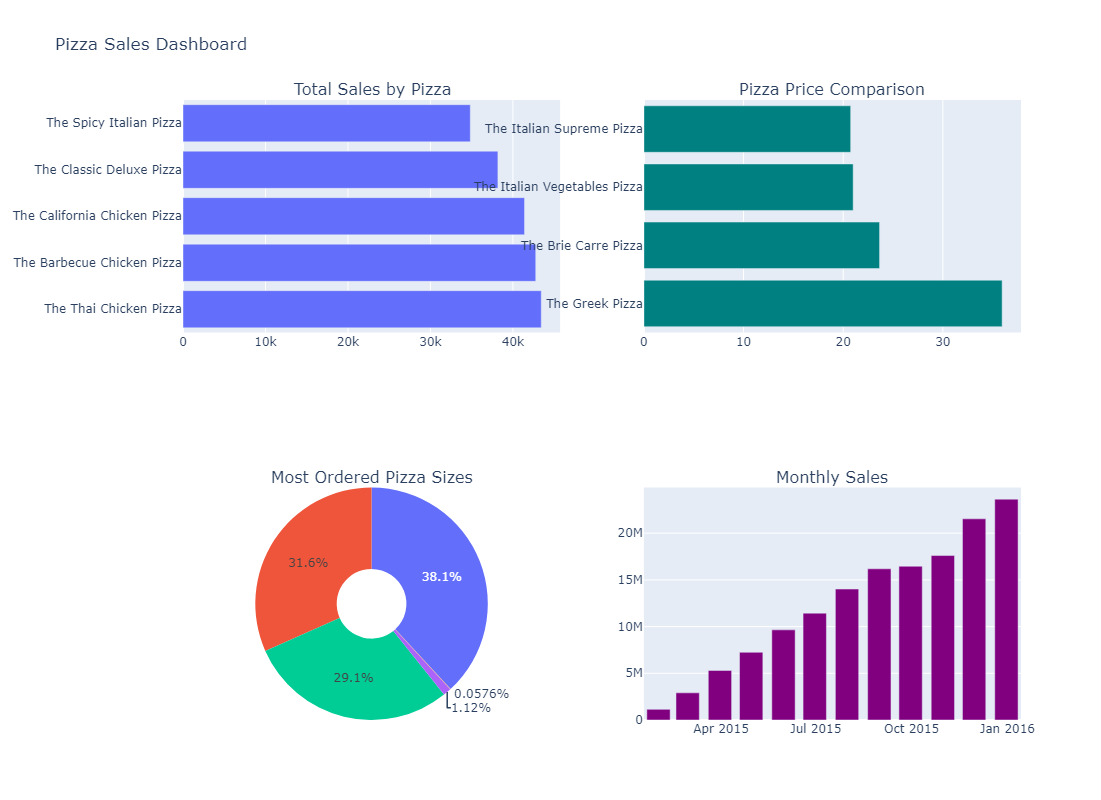

In [92]:


# Load your CSV data
sales_data = pd.read_csv(r"D:\data science\partice_projects\sql projects\pizza-sales---SQL-main\visual\table1.csv")

# Convert the date column to datetime format
sales_data['date'] = pd.to_datetime(sales_data['date'], format='%d-%m-%Y')

# Calculate monthly sales by summing the 'total' column for each month
# sales_data['month'] = sales_data['date'].dt.to_period('M')  # Extract month and year
# monthly_sales = sales_data.groupby('month').sum()['total']  # Sum total sales per month

# Initialize the figure with subplots (2 rows, 2 columns)
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Total Sales by Pizza", "Pizza Price Comparison", 
                    "Most Ordered Pizza Sizes", "Monthly Sales"),
    specs=[[{"type": "bar"}, {"type": "bar"}], 
           [{"type": "pie"}, {"type": "bar"}]]
)

# 1. Total Sales by Pizza (Bar Chart)
fig.add_trace(
    go.Bar(x=table2['total'], y=table2['name'], orientation='h', name='Total Sales'),
    row=1, col=1
)

# 2. Pizza Price Comparison (Bar Chart)
fig.add_trace(
    go.Bar(x=table4['price'], y=table4['name'], orientation='h', name='Pizza Prices', marker=dict(color='teal')),
    row=1, col=2
)

# 3. Most Ordered Pizza Sizes (Pie Chart)
fig.add_trace(
    go.Pie(labels=table5['size'], values=table5['most_ordered'], name='Most Ordered Sizes', hole=0.3),
    row=2, col=1
)

# 4. Monthly Sales (Bar Chart)
fig.add_trace(
    go.Bar(x=monthly_sales.index.astype(str), y=monthly_sales.values, name='Monthly Sales', marker=dict(color='purple')),
    row=2, col=2
)

# Update the layout
fig.update_layout(
    title_text="Pizza Sales Dashboard",
    height=800,
    showlegend=False
)

# Show the combined plotly dashboard
fig.show()
fig.write_html("pizza_sales_dashboard.html")
